In [7]:
import pandas as pd
import requests
import glob
from io import BytesIO
import numpy as np
import os
import shutil
import pprint
import json
from fastai import *
from fastai.vision import *
from fastai.imports import *


In [11]:
path = Path('data/food-101/images')
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=112, num_workers=8, bs=64).normalize(imagenet_stats)

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  'gyoza',
  'hamburger',
  'hot_and_sour_soup',
  'hot_dog',
  'huevos_rancheros',
  'hummu

In [13]:
learn = create_cnn(data, models.resnet34, metrics=error_rate,pretrained=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


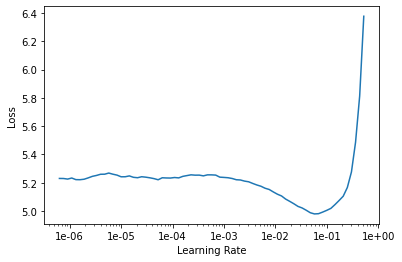

In [74]:
learn.lr_find()
learn.recorder.plot()

In [76]:
lr = 1e-2

In [77]:
learn.fit_one_cycle(8 , lr)

In [15]:
model_name="resnet34"

In [16]:
learn.save(f'{model_name}-stage-1')

In [17]:
learn.load(f'{model_name}-stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (80800 items)
[Category apple_pie, Category apple_pie, Category apple_pie, Category apple_pie, Category apple_pie]...
Path: data\food-101\images
x: ImageItemList (80800 items)
[Image (3, 512, 308), Image (3, 512, 512), Image (3, 512, 384), Image (3, 512, 512), Image (3, 512, 512)]...
Path: data\food-101\images;

Valid: LabelList
y: CategoryList (20200 items)
[Category beef_tartare, Category paella, Category dumplings, Category bread_pudding, Category fish_and_chips]...
Path: data\food-101\images
x: ImageItemList (20200 items)
[Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512)]...
Path: data\food-101\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(k

In [18]:
learn.unfreeze()

In [19]:
learn.lr_find(start_lr=1e-09, end_lr=1e-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


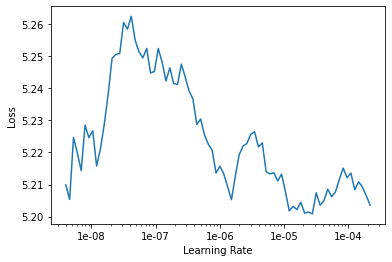

In [20]:
learn.recorder.plot(skip_end=10)

In [84]:
learn.fit_one_cycle(5, max_lr=slice(1e-8,1e-4))

In [85]:
learn.save(f'{model_name}-stage-2')

In [86]:
learn.load(f'{model_name}-stage-2')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (80800 items)
[Category apple_pie, Category apple_pie, Category apple_pie, Category apple_pie, Category apple_pie]...
Path: data\food-101\images
x: ImageItemList (80800 items)
[Image (3, 512, 512), Image (3, 512, 384), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 382)]...
Path: data\food-101\images;

Valid: LabelList
y: CategoryList (20200 items)
[Category hot_and_sour_soup, Category red_velvet_cake, Category ceviche, Category creme_brulee, Category gnocchi]...
Path: data\food-101\images
x: ImageItemList (20200 items)
[Image (3, 384, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 384, 512), Image (3, 512, 512)]...
Path: data\food-101\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool

In [87]:
interp = ClassificationInterpretation.from_learner(learn)

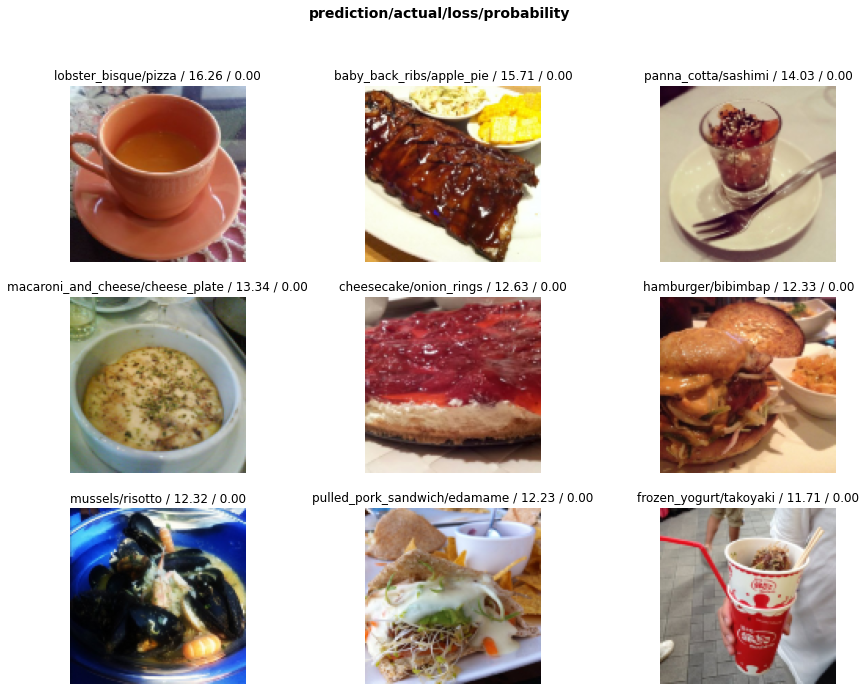

In [88]:
interp.plot_top_losses(9, figsize=(15,11))

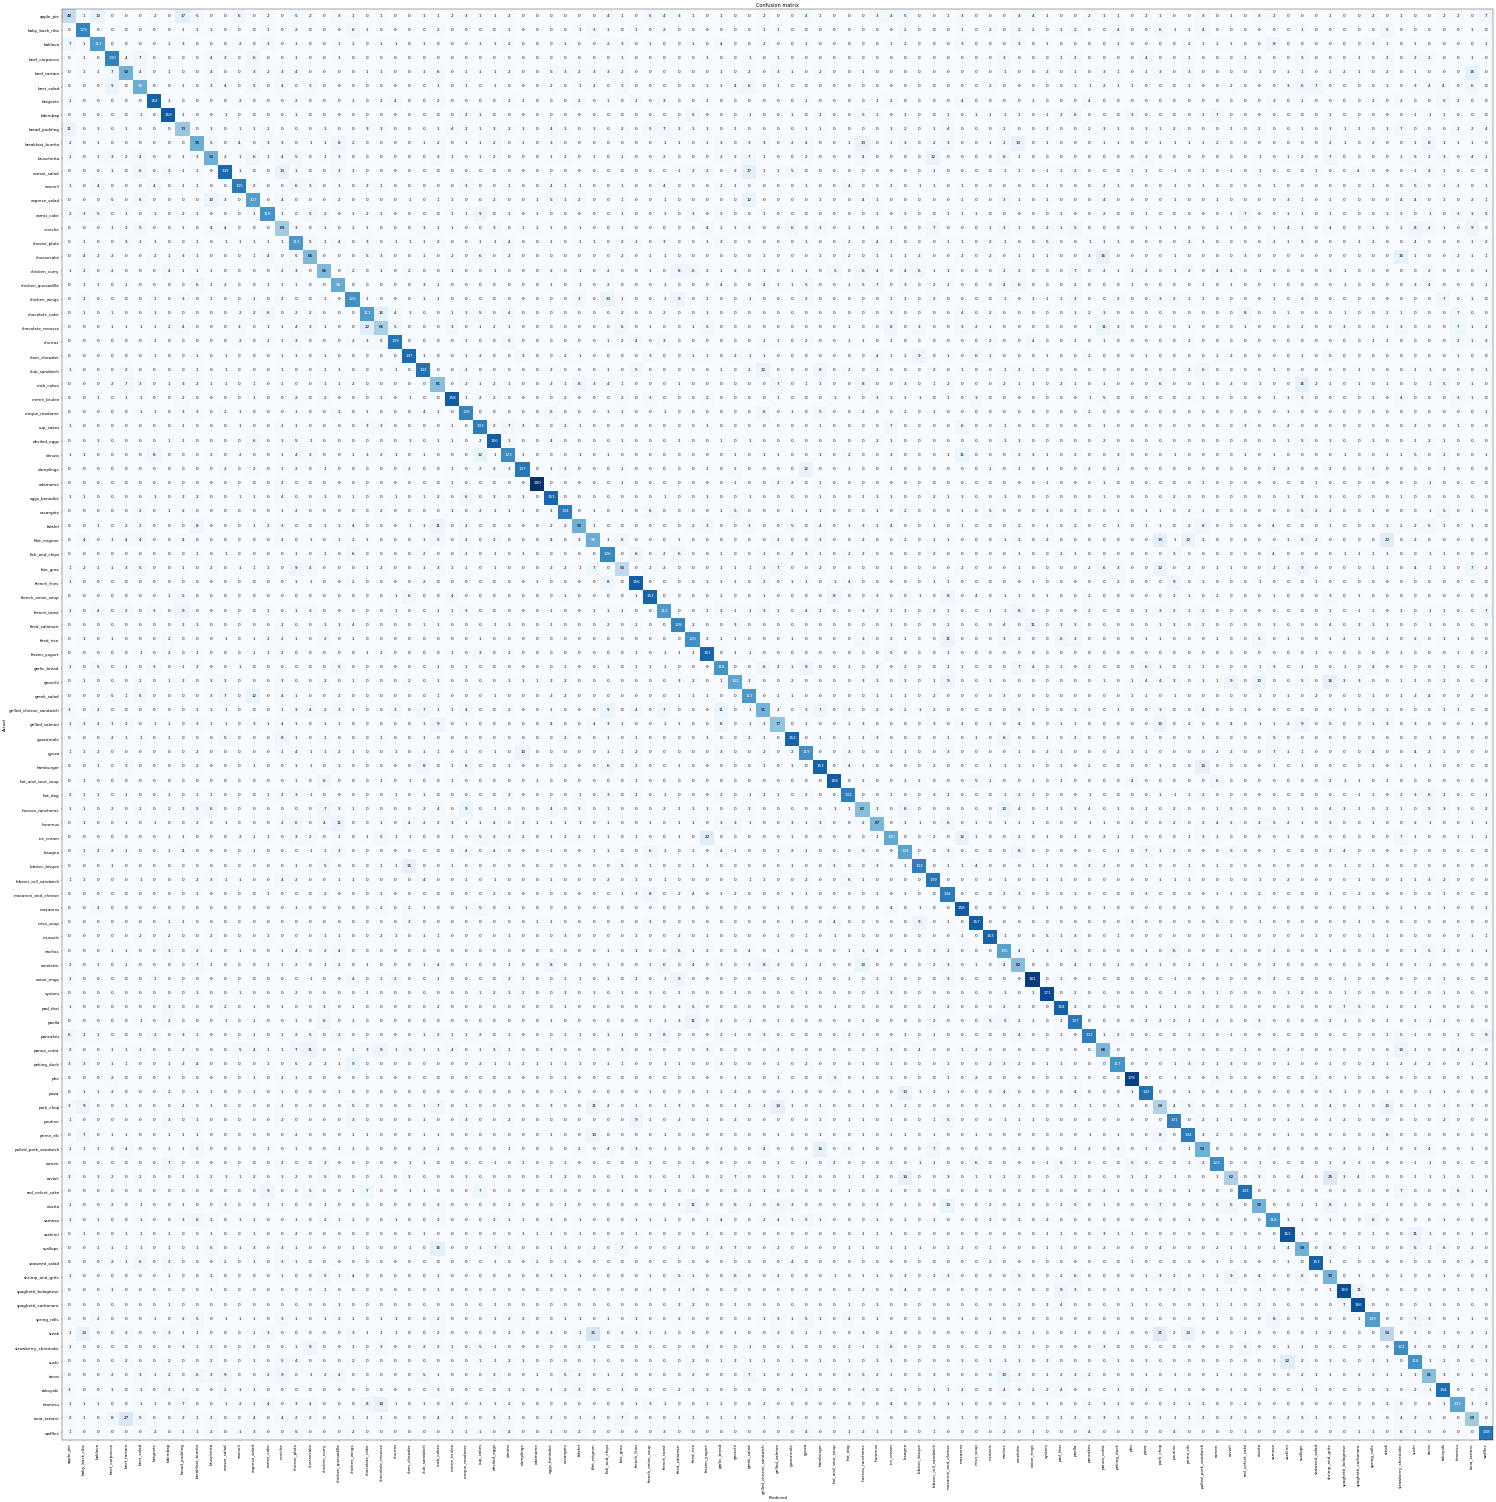

In [89]:
interp.plot_confusion_matrix(figsize=(50,50), dpi=30)

In [90]:
interp.most_confused(min_val=2)

[('steak', 'filet_mignon', 31),
 ('tuna_tartare', 'beef_tartare', 27),
 ('ravioli', 'shrimp_and_grits', 25),
 ('chocolate_mousse', 'chocolate_cake', 22),
 ('filet_mignon', 'steak', 22),
 ('ice_cream', 'frozen_yogurt', 22),
 ('sushi', 'sashimi', 22),
 ('steak', 'pork_chop', 21),
 ('filet_mignon', 'pork_chop', 19),
 ('apple_pie', 'bread_pudding', 17),
 ('caesar_salad', 'greek_salad', 17),
 ('cheesecake', 'panna_cotta', 16),
 ('cheesecake', 'strawberry_shortcake', 16),
 ('chocolate_cake', 'chocolate_mousse', 16),
 ('crab_cakes', 'scallops', 16),
 ('gnocchi', 'shrimp_and_grits', 16),
 ('pulled_pork_sandwich', 'hamburger', 16),
 ('scallops', 'crab_cakes', 16),
 ('beef_tartare', 'tuna_tartare', 15),
 ('lobster_bisque', 'clam_chowder', 15),
 ('hamburger', 'pulled_pork_sandwich', 14),
 ('pork_chop', 'grilled_salmon', 14),
 ('ravioli', 'lasagna', 14),
 ('tiramisu', 'chocolate_mousse', 14),
 ('breakfast_burrito', 'huevos_rancheros', 13),
 ('breakfast_burrito', 'omelette', 13),
 ('caesar_salad', 

In [21]:
final_model_name = f'{model_name}-final'

In [22]:
learn.save(final_model_name)

In [ ]:
# 测试数据

In [23]:
learn.load(final_model_name);

In [96]:
learn.data.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [24]:
data2 = ImageDataBunch.single_from_classes(path, data.classes
                                           , tfms=get_transforms()
                                           , size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load(final_model_name)

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (0 items)
[]...
Path: data\food-101\images
x: ImageItemList (0 items)
[]...
Path: data\food-101\images;

Valid: LabelList
y: CategoryList (0 items)
[]...
Path: data\food-101\images
x: ImageItemList (0 items)
[]...
Path: data\food-101\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    

In [25]:
data2.classes, data2.c

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  'gyoza',
  'hamburger',
  'hot_and_sour_soup',
  'hot_dog',
  'huevos_rancheros',
  'hummu

In [26]:
bibimbap_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Dolsot-bibimbap.jpg/1200px-Dolsot-bibimbap.jpg"

In [27]:
url = bibimbap_url

In [28]:
def fetch_image(url):
    response = requests.get(url)
    img = open_image(BytesIO(response.content))
    return img

In [29]:
img = fetch_image(bibimbap_url)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class , pred_idx, outputs

(Category spaghetti_carbonara,
 tensor(91),
 tensor([0.0026, 0.0169, 0.0032, 0.0102, 0.0065, 0.0010, 0.0110, 0.0078, 0.0095,
         0.0014, 0.0014, 0.0418, 0.0157, 0.0077, 0.0042, 0.0076, 0.0047, 0.0023,
         0.0089, 0.0407, 0.0027, 0.0041, 0.0037, 0.0171, 0.0302, 0.0126, 0.0018,
         0.0006, 0.0010, 0.0053, 0.0019, 0.0027, 0.0204, 0.0251, 0.0065, 0.0083,
         0.0008, 0.0146, 0.0020, 0.0003, 0.0043, 0.0403, 0.0002, 0.0021, 0.0192,
         0.0006, 0.0024, 0.0045, 0.0250, 0.0007, 0.0015, 0.0219, 0.0027, 0.0049,
         0.0146, 0.0152, 0.0135, 0.0037, 0.0055, 0.0017, 0.0096, 0.0142, 0.0239,
         0.0224, 0.0032, 0.0026, 0.0060, 0.0201, 0.0262, 0.0065, 0.0040, 0.0040,
         0.0075, 0.0011, 0.0014, 0.0116, 0.0007, 0.0178, 0.0136, 0.0024, 0.0173,
         0.0039, 0.0027, 0.0086, 0.0045, 0.0058, 0.0025, 0.0287, 0.0012, 0.0020,
         0.0238, 0.1068, 0.0018, 0.0053, 0.0053, 0.0019, 0.0016, 0.0042, 0.0038,
         0.0057, 0.0125]))

In [30]:
def predict(url):
    img = fetch_image(url)
    pred_class,pred_idx,outputs = learn.predict(img)
    res =  zip (learn.data.classes, outputs.tolist())
    predictions = sorted(res, key=lambda x:x[1], reverse=True)
    top_predictions = predictions[0:5]
    pprint.pprint(top_predictions)
    return img.resize(500)


[('club_sandwich', 0.07745547592639923),
 ('french_onion_soup', 0.06914553046226501),
 ('clam_chowder', 0.04844677075743675),
 ('filet_mignon', 0.04378146305680275),
 ('cannoli', 0.03966710716485977)]


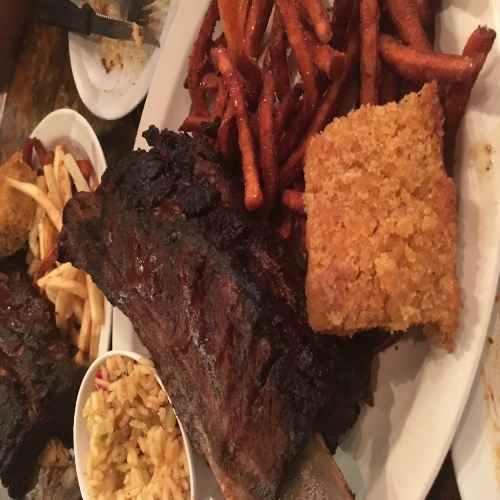

In [31]:
baby_back_url ="https://upload.wikimedia.org/wikipedia/commons/e/ee/Baby_back_ribs_with_fries.jpg"
predict(baby_back_url)

[('spaghetti_carbonara', 0.17110413312911987),
 ('fried_rice', 0.06864962726831436),
 ('chicken_quesadilla', 0.044774070382118225),
 ('huevos_rancheros', 0.0371764712035656),
 ('spaghetti_bolognese', 0.0357794389128685)]


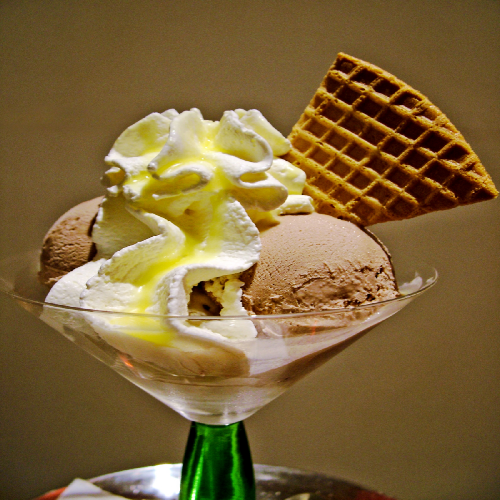

In [34]:
icecream_url = "https://upload.wikimedia.org/wikipedia/commons/3/31/Ice_Cream_dessert_02.jpg"
predict(icecream_url)

[('spaghetti_carbonara', 0.14201787114143372),
 ('dumplings', 0.05794386565685272),
 ('filet_mignon', 0.056757569313049316),
 ('cannoli', 0.040175653994083405),
 ('macarons', 0.028550680726766586)]


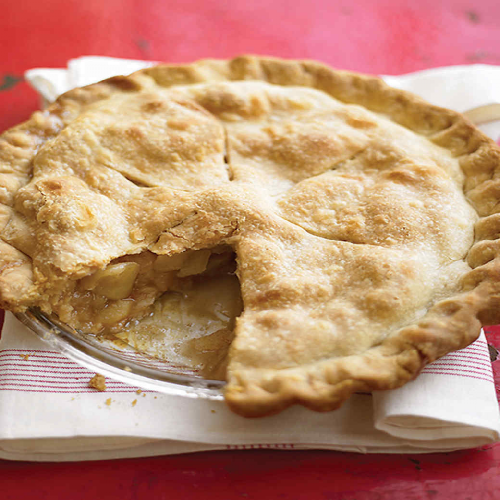

In [33]:
apple_pie_url= "https://th.bing.com/th/id/R235c70fad6277b28eea16a97c6604fe9?rik=AuxpobfMxIaKRg&riu=http%3a%2f%2fassets.marthastewart.com%2fstyles%2fwmax-520-highdpi%2fd30%2fmed102471cov004_1106_apple_pie%2fmed102471cov004_1106_apple_pie_vert.jpg%3fitok%3dVSZ7k1Ss&ehk=yHPJsJl%2fAg0rbHSQncnBKVoeFq38qCMVsIUVn0HBkcM%3d&risl=&pid=ImgRaw"
predict(apple_pie_url)

[('spaghetti_carbonara', 0.2033587098121643),
 ('dumplings', 0.042590897530317307),
 ('nachos', 0.034554168581962585),
 ('lobster_bisque', 0.03204672038555145),
 ('filet_mignon', 0.03154512867331505)]


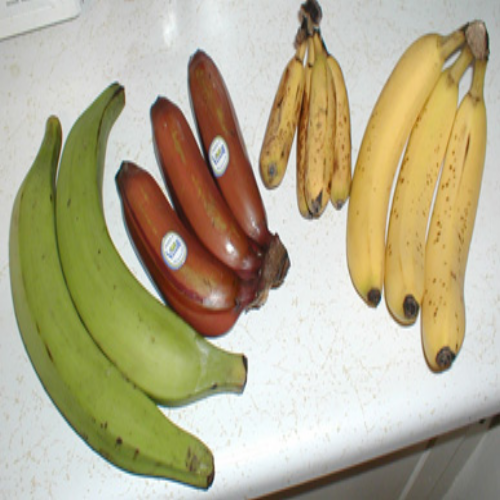

In [35]:
banana_url = "https://upload.wikimedia.org/wikipedia/commons/d/de/Bananavarieties.jpg"
predict(banana_url)

In [42]:
shutil.rmtree("models",ignore_errors=True)

In [43]:
final_model_directory = os.getcwd()+ "/models"
final_model_name='model.pkl'

In [45]:
learn.export(final_model_directory+f"/{final_model_name}")

In [47]:
cd

C:\Users\30435


In [48]:
learn3= load_learner(final_model_directory,final_model_name)

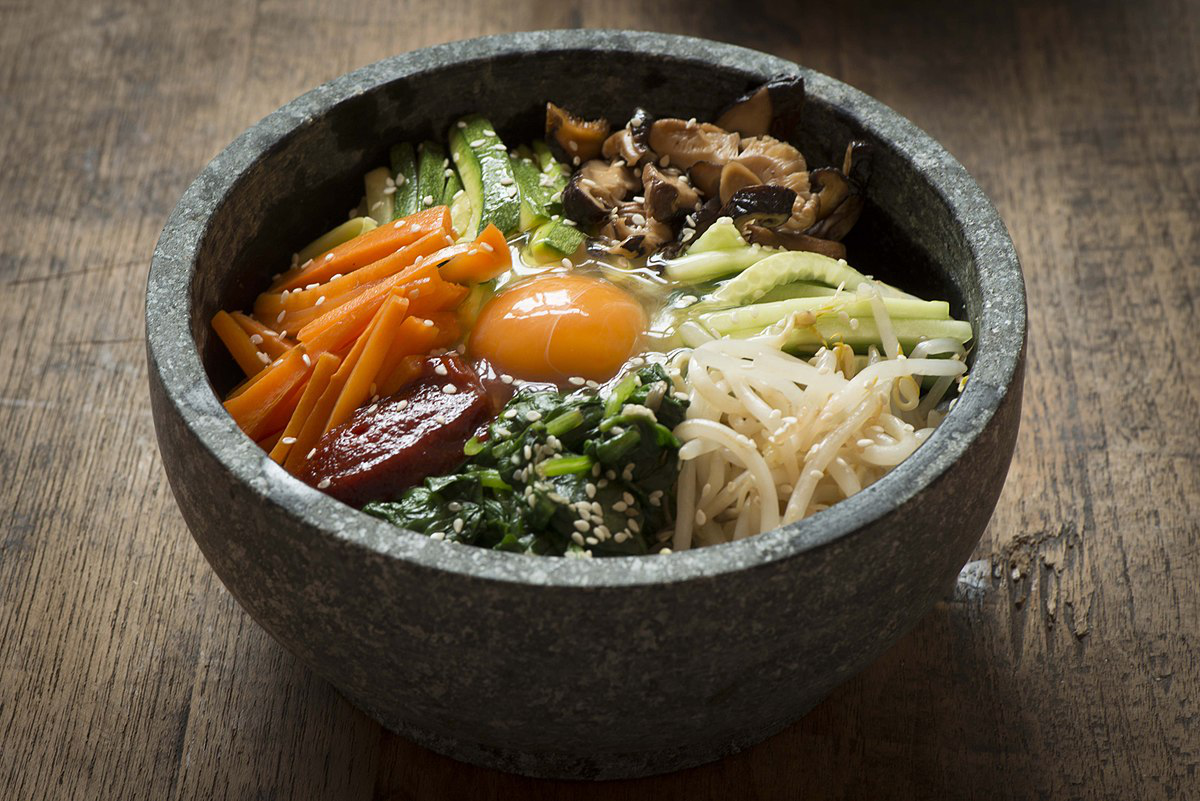

In [49]:
img

In [50]:
learn3.predict(img)

(Category spaghetti_carbonara,
 tensor(91),
 tensor([0.0026, 0.0169, 0.0032, 0.0102, 0.0065, 0.0010, 0.0110, 0.0078, 0.0095,
         0.0014, 0.0014, 0.0418, 0.0157, 0.0077, 0.0042, 0.0076, 0.0047, 0.0023,
         0.0089, 0.0407, 0.0027, 0.0041, 0.0037, 0.0171, 0.0302, 0.0126, 0.0018,
         0.0006, 0.0010, 0.0053, 0.0019, 0.0027, 0.0204, 0.0251, 0.0065, 0.0083,
         0.0008, 0.0146, 0.0020, 0.0003, 0.0043, 0.0403, 0.0002, 0.0021, 0.0192,
         0.0006, 0.0024, 0.0045, 0.0250, 0.0007, 0.0015, 0.0219, 0.0027, 0.0049,
         0.0146, 0.0152, 0.0135, 0.0037, 0.0055, 0.0017, 0.0096, 0.0142, 0.0239,
         0.0224, 0.0032, 0.0026, 0.0060, 0.0201, 0.0262, 0.0065, 0.0040, 0.0040,
         0.0075, 0.0011, 0.0014, 0.0116, 0.0007, 0.0178, 0.0136, 0.0024, 0.0173,
         0.0039, 0.0027, 0.0086, 0.0045, 0.0058, 0.0025, 0.0287, 0.0012, 0.0020,
         0.0238, 0.1068, 0.0018, 0.0053, 0.0053, 0.0019, 0.0016, 0.0042, 0.0038,
         0.0057, 0.0125]))

In [1]:
banana_url = "‪E:\Pycharm\TensorFlow_project\web-and-mobile\web-deep-learning-classifier-master\data\food-101\images\apple_pie\98449.jpg"
predict(banana_url)

NameError: name 'predict' is not defined